In [14]:
from sklearn.datasets import fetch_20newsgroups
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Embedding, Flatten

In [15]:
# fetch the data
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [16]:
y = twenty_train.target

In [17]:
sentences = twenty_train.data

In [18]:
# Tokenize the sentences into words we set up the number of words to be 2000
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [19]:
sentences = tokenizer.texts_to_matrix(sentences)

In [20]:
# encode and process our data labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [22]:
# First we create layers of size 2000 for input layer and 128 for the hidden layer and 20 for the output we set the epochs to 50
model = Sequential()
model.add(layers.Dense(128,input_dim=2000, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model.fit(X_train,y_train, epochs=10, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/10
8485/8485 [==============================] - 1s 65us/step - loss: 2.4696 - acc: 0.3776 - val_loss: 1.7390 - val_acc: 0.6610
Epoch 2/10
8485/8485 [==============================] - 0s 56us/step - loss: 1.2533 - acc: 0.7769 - val_loss: 1.0681 - val_acc: 0.7731
Epoch 3/10
8485/8485 [==============================] - 0s 56us/step - loss: 0.7624 - acc: 0.8625 - val_loss: 0.8331 - val_acc: 0.8035
Epoch 4/10
8485/8485 [==============================] - 0s 56us/step - loss: 0.5469 - acc: 0.8997 - val_loss: 0.7149 - val_acc: 0.8240
Epoch 5/10
8485/8485 [==============================] - 0s 58us/step - loss: 0.4183 - acc: 0.9250 - val_loss: 0.6526 - val_acc: 0.8307
Epoch 6/10
8485/8485 [==============================] - 0s 58us/step - loss: 0.3329 - acc: 0.9445 - val_loss: 0.6132 - val_acc: 0.8353
Epoch 7/10
8485/8485 [==============================] - 0s 58us/step - loss: 0.2698 - acc: 0.9582 - val_loss: 0.5947 - val_acc: 0.8353
Epoch 8

In [23]:
# Evaluation result on Test Data
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2829/2829 [==============================] - 0s 44us/step
Evaluation result on Test Data : Loss = 0.5577138798023628, accuracy = 0.8398727178573608


In [24]:
predict_classe = model.predict_classes(X_test[[1000],:])
print(predict_classe[0])
print(y_test[1000])

19
19


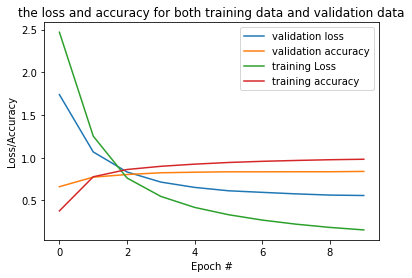

In [25]:
# plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 10), history1.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 10), history1.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 10), history1.history["loss"], label="training Loss")
plt.plot(np.arange(0, 10), history1.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [26]:
# add embedding layer with flatten
model2 = Sequential()
model2.add(Embedding(2000, 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(128,input_dim=2000, activation='relu'))
model2.add(layers.Dense(20,activation='softmax'))

In [27]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [28]:
history2=model2.fit(X_train,y_train, epochs=10, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8485 samples, validate on 2829 samples
Epoch 1/10
8485/8485 [==============================] - 22s 3ms/step - loss: 3.2143 - acc: 0.0707 - val_loss: 2.9481 - val_acc: 0.0753
Epoch 2/10
8485/8485 [==============================] - 21s 3ms/step - loss: 2.8545 - acc: 0.1465 - val_loss: 2.7350 - val_acc: 0.1891
Epoch 3/10
8485/8485 [==============================] - 21s 3ms/step - loss: 2.4217 - acc: 0.3586 - val_loss: 2.1268 - val_acc: 0.4295
Epoch 4/10
8485/8485 [==============================] - 21s 3ms/step - loss: 1.6561 - acc: 0.5821 - val_loss: 1.4653 - val_acc: 0.5938
Epoch 5/10
8485/8485 [==============================] - 21s 2ms/step - loss: 1.0756 - acc: 0.7242 - val_loss: 1.0960 - val_acc: 0.6967
Epoch 6/10
8485/8485 [==============================] - 21s 2ms/step - loss: 0.7439 - acc: 0.8037 - val_loss: 0.8784 - val_acc: 0.7522
Epoch 7/10
8485/8485 [==============================] - 21s 3ms/step - loss: 0.5358 - acc: 0.8653 - val_loss: 0.7989 - val_acc: 0.7663
Epoch 8

In [29]:
[test_loss, test_acc] = model2.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2829/2829 [==============================] - 2s 630us/step
Evaluation result on Test Data : Loss = 0.7186377940981916, accuracy = 0.792859673500061


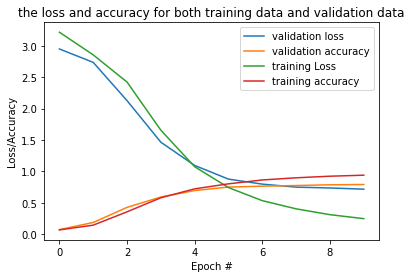

In [30]:
# plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 10), history2.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 10), history2.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 10), history2.history["loss"], label="training Loss")
plt.plot(np.arange(0, 10), history2.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [31]:
predict_classe2 = model2.predict_classes(X_test[[1000],:])
print(predict_classe2[0])
print(y_test[1000])

19
19
